This notebook looks at the behavioral data collected as part of the LEMON Project. We'd like to know which of these questionaaire might be a better choice for a classification task. So our first question would be what can resting state EEG data reveal about which people's current mental state, and their emotional and cognitive abilities. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data_dir = 'data/LEMON_data/behavioral/Behavioural_Data_MPILMBB_LEMON/'

## Personality and Emotions

### MDBF

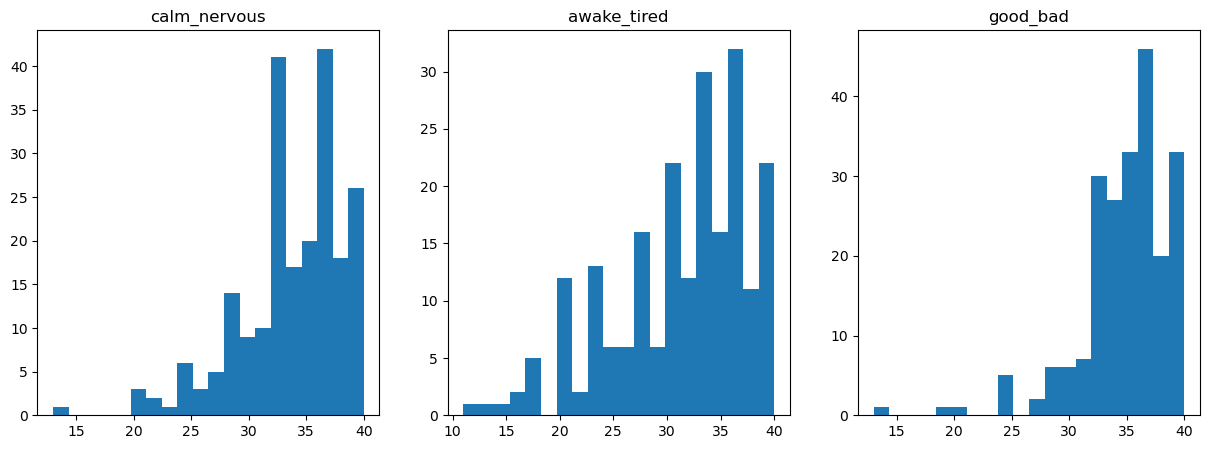

In [7]:
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'
data = pd.read_csv(data_dir+'MDBF_Day2.csv',
                   index_col=0)
data.rename(columns={'MDBF_Day2_RU_Scale': 'calm_nervous',
                     'MDBF_Day2_WM_Scale': 'awake_tired',
                     'MDBF_Day2_GS_Scale': 'good_bad'}, inplace=True)
data.describe()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(data['calm_nervous'], bins=20)
ax[0].set_title('calm_nervous')
ax[1].hist(data['awake_tired'], bins=20)
ax[1].set_title('awake_tired')
ax[2].hist(data['good_bad'], bins=20)
ax[2].set_title('good_bad')
plt.show()

### Emotional Regulation 

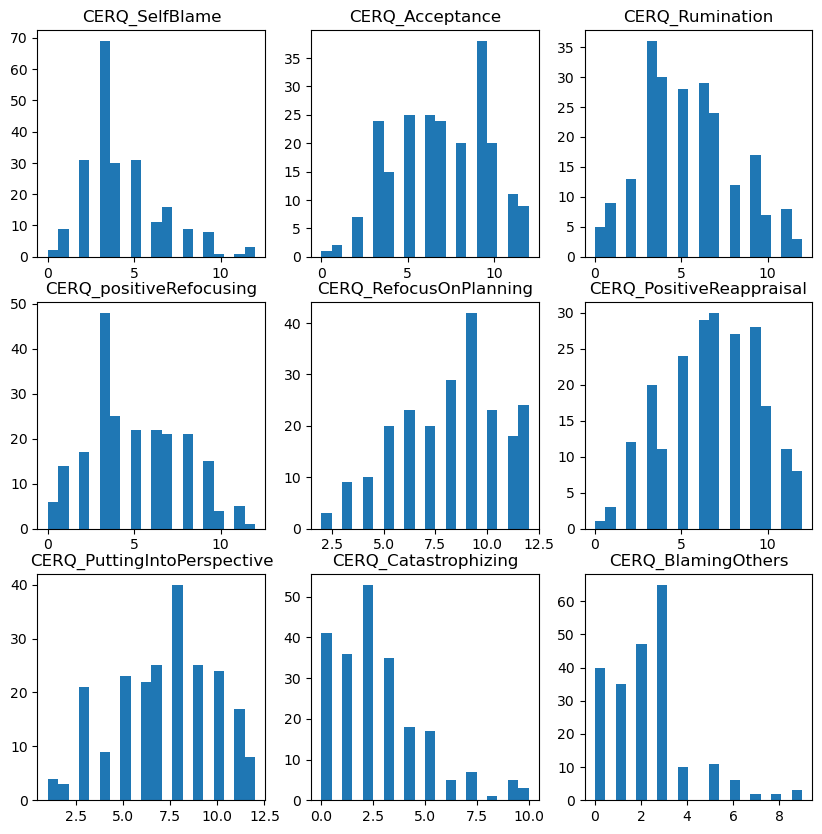

In [6]:
data = pd.read_csv(data_dir+'CERQ.csv',
                   index_col=0)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, col in enumerate(data.columns):
    ax[i//3, i%3].hist(data[col], bins=20)
    ax[i//3, i%3].set_title(col)


### Other Questionaires

In [18]:
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'

Text(0.5, 1.0, 'FTP_SUM')

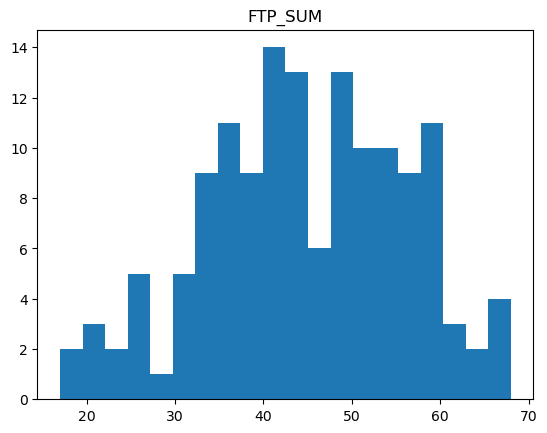

In [48]:
data = pd.read_csv(path, index_col=0)
data.dropna(inplace=True)

plt.hist(data['FTP_SUM'], bins=20)
plt.title('FTP_SUM')

1 ERQ
﻿ERQ
Emotion Regulation Questionnaire

References
1. Gross, J. J., & John, O. P. (2003). Individual differences in two emotion regulation processes: implications for affect, relationships, and well-being. Journal of personality and social psychology, 85(2), 348. doi: 10.1037/0022-3514.85.2.348
2. Abler, B., & Kessler, H. (2009). Emotion Regulation Questionnaire - Eine deutsche Version des ERQ von Gross & John. Diagnostica, 55(3), 144-152. doi: 10.1026/0012-1924.55.3.144


Timeframe
Trait

10 Items


Answer Codes:
from 1 (strongly disagree) to 7 (strongly agree). 

1 = stimmt überhaupt nicht
2
3
4 = neutral
5
6
7 = stimmt vollkommen



Subscales/Columns:	
ERQ_reappraisal: Reappraisal		
ERQ_suppression: Suppression



2 F-SozU_K-22
﻿F-SozU K-22
Social Support Questionnaire

References
1. Fydrich, T., Sommer, G., & Brähler, E. (2007). F-SOZU: Fragebogen zur sozialen Unterstützung. Göttingen: Hogrefe.
2. Fydrich, T., Geyer, M., Hessel, A., Sommer, G. & Brähler, E. (1999). Fragebogen 

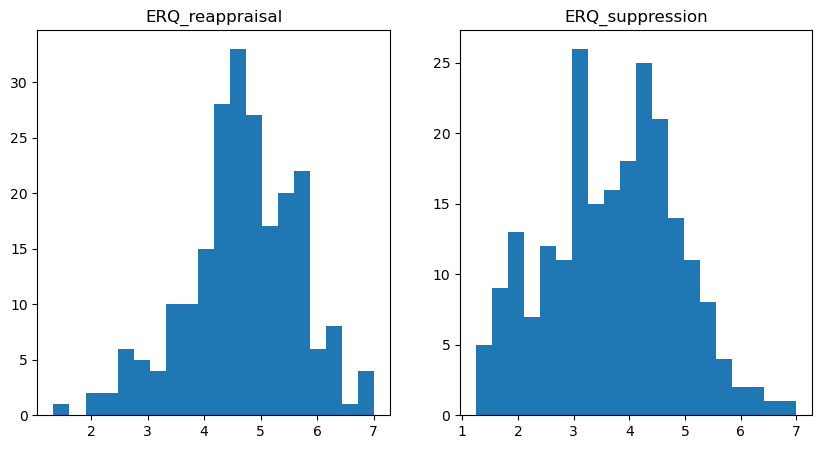

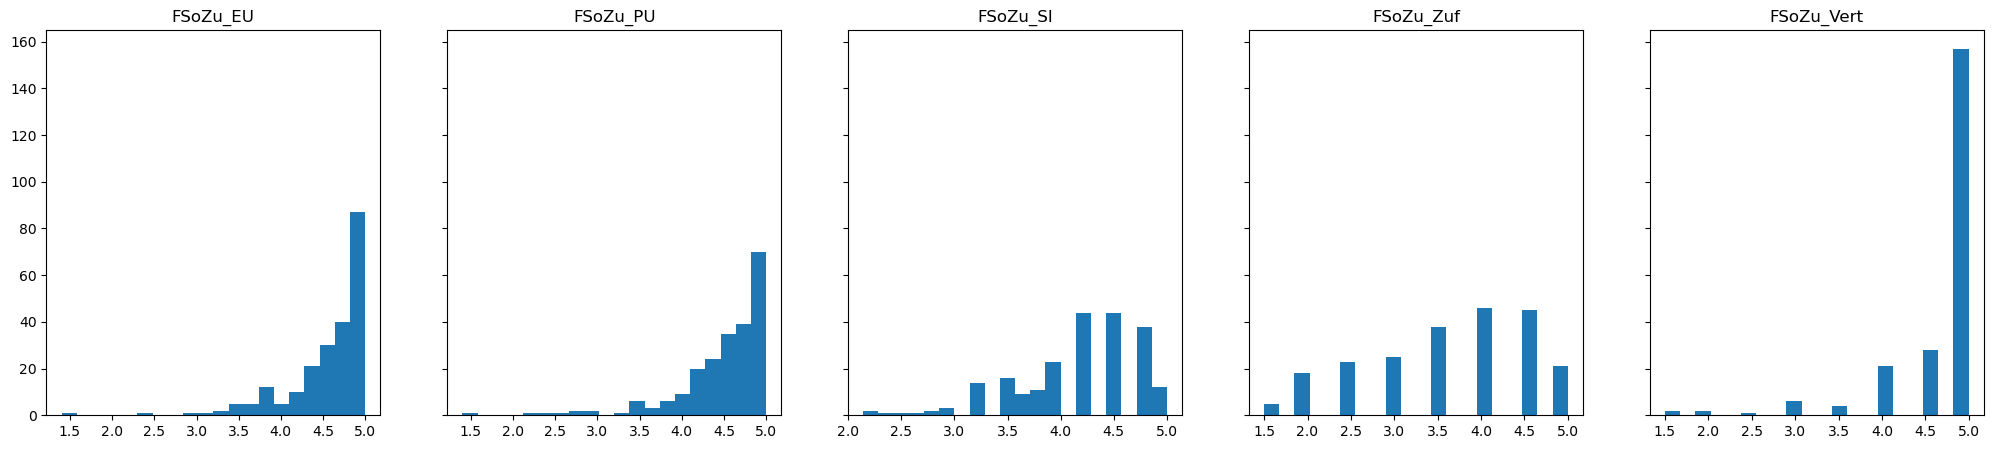

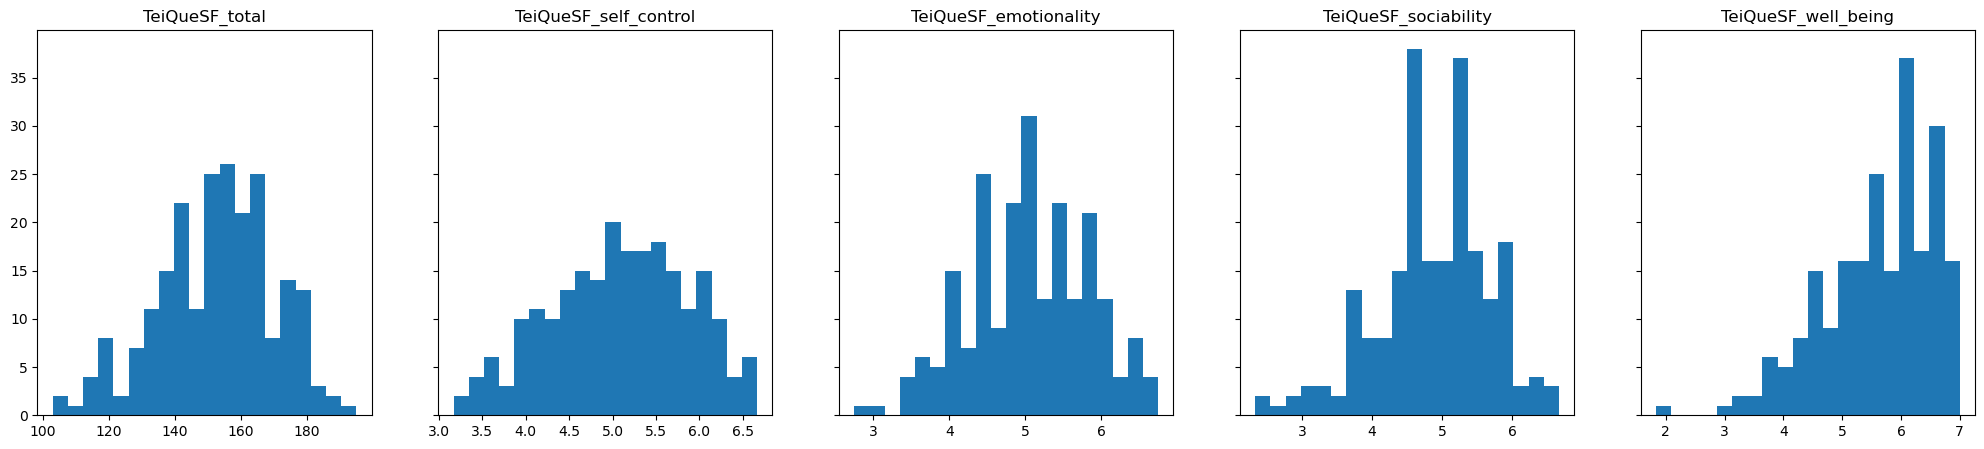

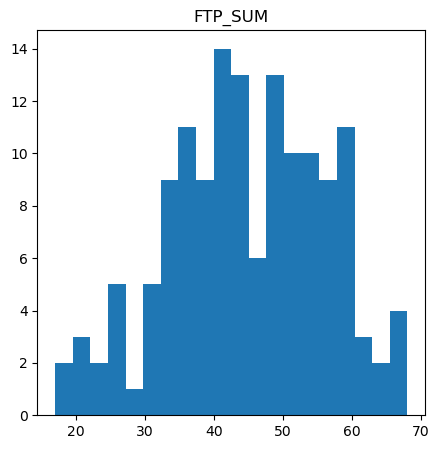

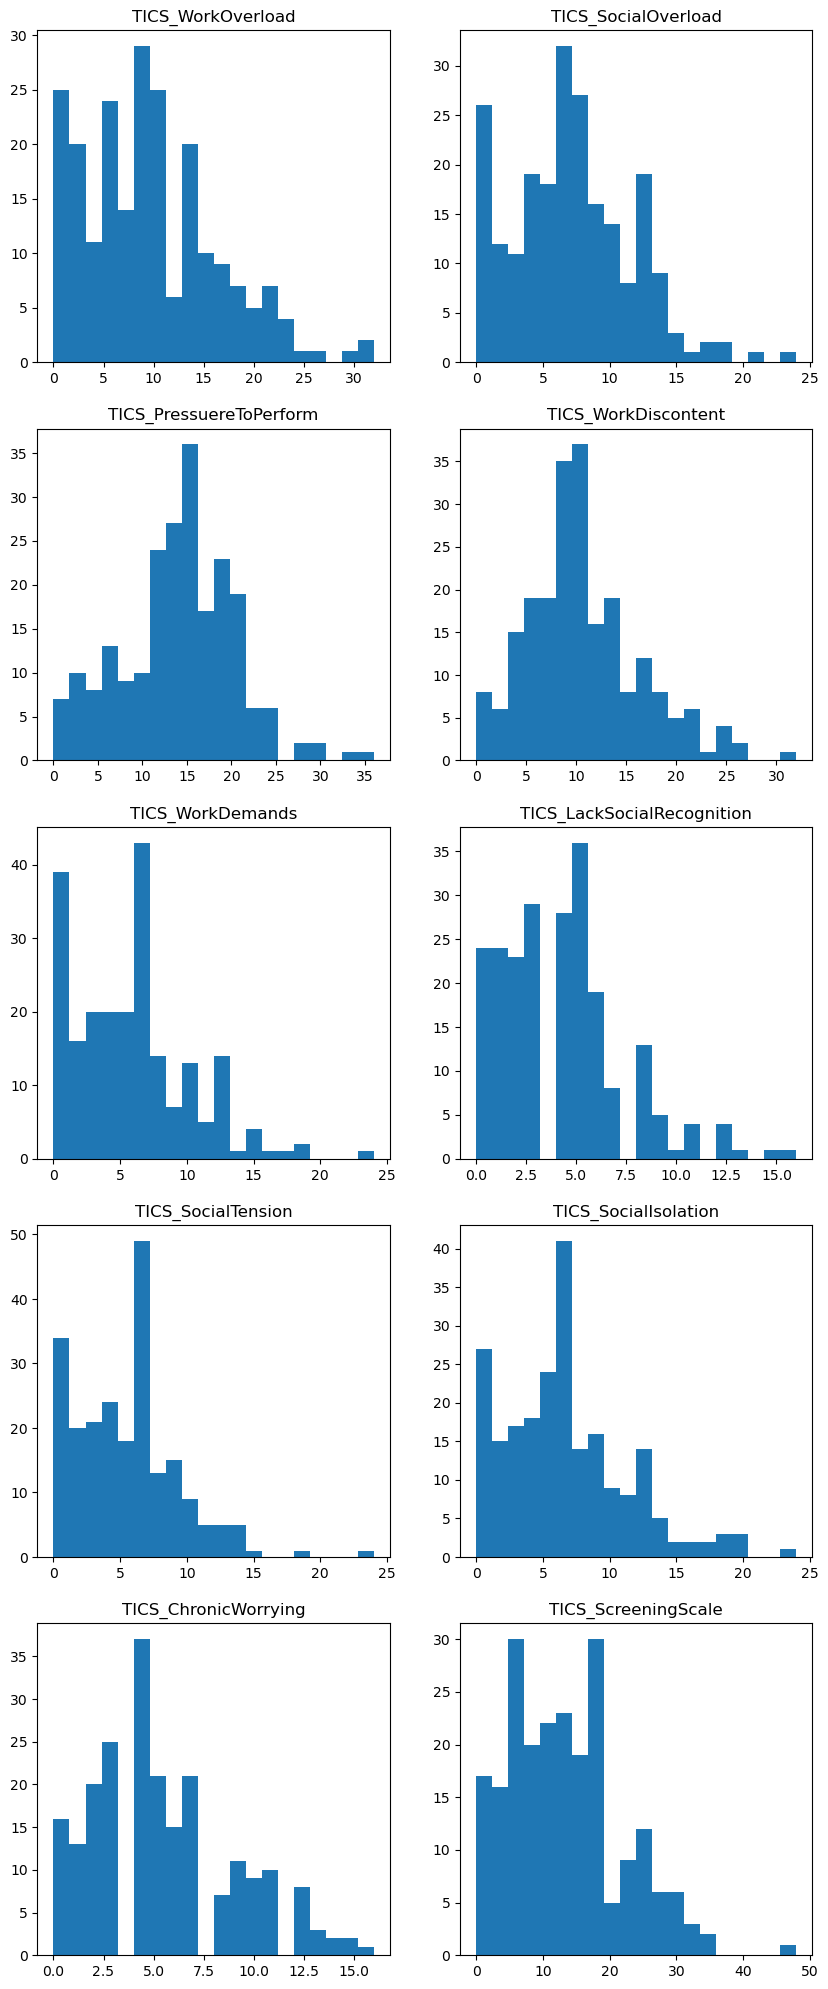

In [52]:
from pathlib import Path

for i, path in enumerate(list(Path(data_dir).rglob('*.csv'))[:5]):
    if path.stem.__contains__('MDBF'):
        continue
    print(i+1, '\033[1m' + path.stem + '\033[0m')
    with open(path.parent / (path.stem + '_info.txt'), 'r') as f:
        print(f.read())
    data = pd.read_csv(path, index_col=0)
    columns = data.columns
    if len(columns) == 1:
        plt.figure(figsize=(5, 5))
        plt.hist(data[columns[0]], bins=20)
        plt.title(str(columns[0]))
    elif len(columns)%2 == 0:
        fig, ax = plt.subplots(len(columns)//2, 2, figsize=(10, 5*len(columns)//2))
        for j, col in enumerate(columns):
            if len(columns)//2 == 1:
                ax[j%2].hist(data[col], bins=20)
                ax[j%2].set_title(col)
            else:
                ax[j//2, j%2].hist(data[col], bins=20)
                ax[j//2, j%2].set_title(col)
    elif len(columns) <= 5:
        fig, ax = plt.subplots(1, len(columns), figsize=(5*len(columns), 5), sharey=True)
        for j, col in enumerate(columns):
            ax[j].hist(data[col], bins=20)
            ax[j].set_title(col)
    elif len(columns) // 3 == 0:
        fig, ax = plt.subplots(len(columns)//3, 3, figsize=(5*3, 5*len(columns)//3))
        for j, col in enumerate(columns):
            ax[j//3, j%3].hist(data[col], bins=20)
            ax[j//3, j%3].set_title(col)
    else:
        print('>>>>>> This hist of this dataset has not plotted', path.stem, len(columns))